# Optimization under Uncertainty on the Himmelbau Function

In [1]:
import sys
sys.path.insert(1, '../')

import numpy as np
from bayesopt import BayesianOptimization

from riskkernel import Normal_SEKernel
from surrogate import GaussianProcessRiskNeutral, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

from strategy import EIStrategy, SRBFStrategy, RandomStrategy
from experimental_design import SymmetricLatinHypercube as SLHC
import matplotlib.pyplot as plt

In [2]:
"""Himmelbau Function 2-Dimensional
Four equivalent minima with function value zero at (3,2), (-2.8,3.13), (-3.779,3.28), (3.58,-1.84)
"""
f = lambda x: ((x[0]**2 + x[1] - 11)**2 + (x[0]+x[1]**2 - 7)**2)/700.0
#f = lambda x: x[0]**2 + x[1]**2

# just for plotting...easier to evaluate with meshgrid
g = lambda x,y: ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)/700.0
#g = lambda x,y: x**2 + y**2
# dimension
dim        = 2

# make sure minima are in the feasible region
lb         = np.array([-4.0,-2.0])
ub         = 4.0*np.ones(dim)

# maximum evaluations
max_evals  = 300

In [21]:
# experimental design
initial_num_pts    = 295 # initial evaluations
exp_design = SLHC(dim, initial_num_pts)

# strategy
strategy   = SRBFStrategy(lb,ub)

# uncertainty variance
var    = 1.0
K      = var*np.eye(dim)

# risk-neutral GP kernel
kernel     = Normal_SEKernel(K)
surrogate  = GaussianProcessRiskNeutral(kernel)

# initialize surrogate
#kernel = ConstantKernel(1, (1e-3, 1e3)) * RBF(1, (0.01, 100)) + \
          #WhiteKernel(1e-3, (1e-6, 1e-2))
#surrogate = GaussianProcessRegressor(kernel =kernel)


# initialize the problem
problem    = BayesianOptimization(f,dim, max_evals, exp_design, strategy, surrogate,lb, ub)

In [22]:
# solve the problem
xopt,fopt  = problem.minimize()

/home/padidar/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.57937521e+00, -8.83984938e-03,  1.30891216e+02]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 17, 'warnflag': 2}
  ConvergenceWarning)
/home/padidar/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.58571708e+00, -1.31645276e-04,  1.31883119e+02]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 17, 'warnflag': 2}
  ConvergenceWarning)


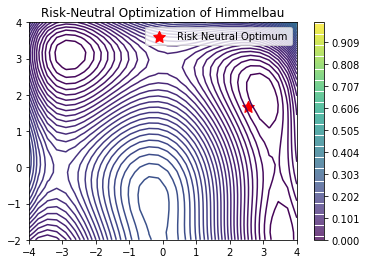

In [23]:
# plot the function
Ntest = 30
x = np.linspace(lb[0],ub[0],Ntest)
y = np.linspace(lb[1],ub[1],Ntest)
xx,yy = np.meshgrid(x,y)
Z   = g(xx,yy)
plt.contour(xx,yy,Z,np.linspace(0,1,100))
plt.colorbar()

# plot the optimum
plt.scatter(xopt[0],xopt[1],color='r',s=150, marker=(5,1),label='Risk Neutral Optimum')

plt.title('Himmelbau function')
plt.legend()
plt.show()

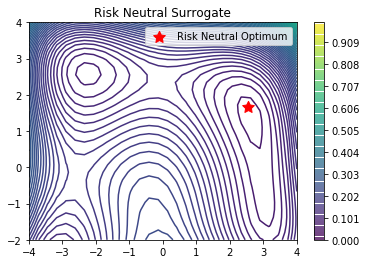

In [28]:
# plot the surrogate
X_grid = np.c_[ np.ravel(xx), np.ravel(yy) ]
z = surrogate.predict(X_grid)
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,np.linspace(0.0,1.0,100))
plt.colorbar()

# plot the optimum
plt.scatter(xopt[0],xopt[1],color='r',s=150, marker=(5,1),label='Risk Neutral Optimum')
plt.legend()
plt.title('Risk Neutral Surrogate')
plt.show()